In [37]:
import xarray as xr
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from scipy import stats

In [34]:
rootdir = '../../data/cmip/processed/global_integrals/'
paths = glob.glob(rootdir+'*.nc')
dd = {}
for path in paths:
    model = os.path.basename(path)[:-21]
    print(model)
    dd[model] = xr.open_dataset(path,use_cftime=True)
nm = len(dd)

ACCESS-ESM1-5
CanESM5-CanOE
CNRM-ESM2-1
IPSL-CM6A-LR
NorESM1-F
NorCPM1
MPI-ESM1-2-LR
CESM2-WACCM
CESM2-WACCM-FV2
GFDL-ESM4
MPI-ESM-1-2-HAM
CESM2-FV2
CanESM5
MRI-ESM2-0
CESM2


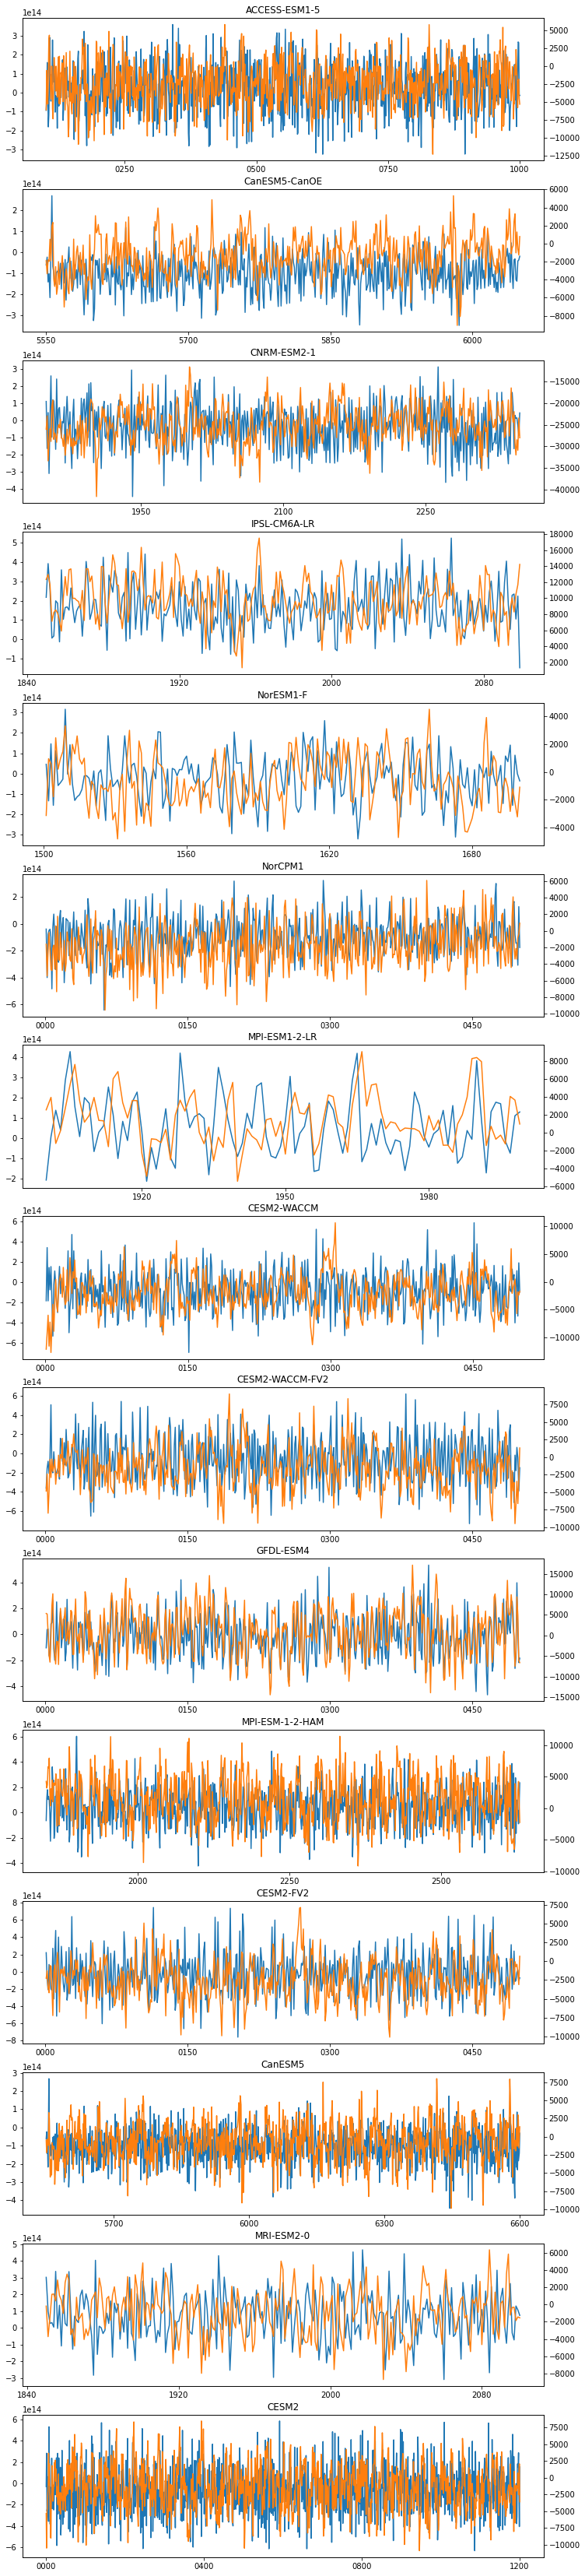

In [47]:
fig,axarr = plt.subplots(nrows = nm, figsize = (12,nm*4))
i=0
for model, ds in dd.items():
    # ds = ds.rolling({'time':10},center=True).mean()
    ax = axarr.flat[i]
    ax.plot(ds['time'],-1*ds['hfds'])
    ax.set_title(model)
    axnow = ax.twinx()
    axnow.plot(ds['time'],ds['fgco2'],color='tab:orange')
    i+=1

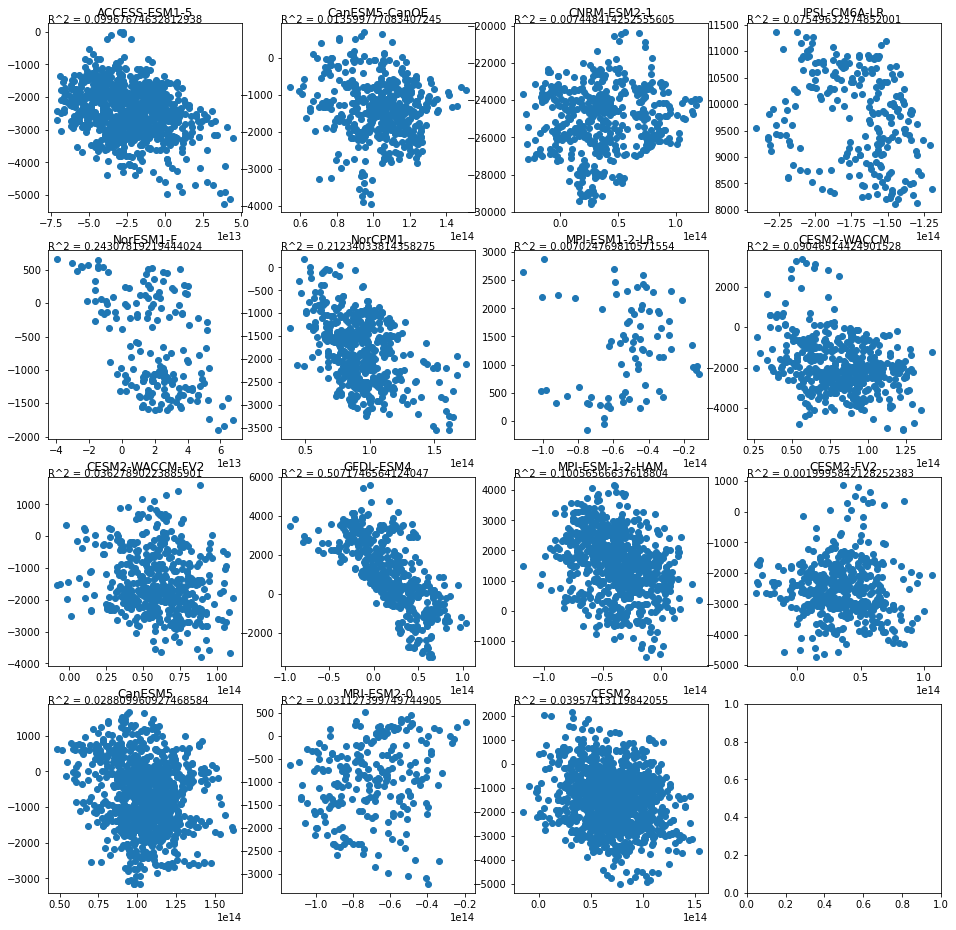

In [46]:
sqnm = int(np.ceil(np.sqrt(nm)))
fig,axarr = plt.subplots(nrows=sqnm, ncols=sqnm, figsize = (sqnm*4,sqnm*4))
r2 = {}
i=0
for model, ds in dd.items():
    ds = ds.rolling({'time':20},center=True).mean()
    # Linear regression
    x = ds['hfds']
    y = ds['fgco2']
    mask = ~np.isnan(x) & ~np.isnan(y)
    result = stats.linregress(x[mask],y[mask])
    r2[model]=result.rvalue**2
    
    ax = axarr.flat[i]
    ax.scatter(ds['hfds'],ds['fgco2'])
    
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    ax.text(xlims[0],ylims[1],'R^2 = '+str(result.rvalue**2))
    
    ax.set_title(model)
    
    i+=1

In [42]:
result

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)